In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('flights_data.csv')
df.head()

,Unnamed: 0,Name,Arrival,Departure,Duration,Price
0,0,SpiceJet\nSG 8184,10:40\nDelhi,12:50\nMumbai,2h 10m\nNon Stop,5953
1,1,SpiceJet\nSG 507,20:20\nDelhi,22:40\nMumbai,2h 20m\nNon Stop,5953
2,2,SpiceJet\nSG 611,18:40\nDelhi,20:40\nMumbai,2h 00m\nNon Stop,5953
3,3,SpiceJet\nSG 757,16:20\nDelhi,18:30\nMumbai,2h 10m\nNon Stop,5953
4,4,Indigo\n6E 2339,21:55\nDelhi,00:05+1D\nMumbai,2h 10m\nNon Stop,5953


In [4]:
#checking the information of the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1573 non-null   int64 
 1   Name        1573 non-null   object
 2   Arrival     1573 non-null   object
 3   Departure   1573 non-null   object
 4   Duration    1573 non-null   object
 5   Price       1573 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 73.9+ KB


In [5]:
#checking the shape of the train dataset
df.shape

(1573, 6)

In [6]:
#checking the data types of dataset
df.dtypes

Unnamed: 0     int64
Name          object
Arrival       object
Departure     object
Duration      object
Price          int64
dtype: object

In [7]:
#checking the columns of the train dataset
df.columns

Index(['Unnamed: 0', 'Name', 'Arrival', 'Departure', 'Duration', 'Price'], dtype='object')

# Statistical Summary

In [8]:
#ch3cking the description/summary of the dataset
df.describe()

,Unnamed: 0,Price
count,1573.000000,1573.000000
mean,786.000000,10754.796567
std,454.230301,4529.753777
min,0.000000,4450.000000
25%,393.000000,7391.000000
50%,786.000000,9902.000000
75%,1179.000000,13297.000000
max,1572.000000,34408.000000


# Exploring Target Variable

In [9]:
df['Price'].value_counts()

7486     48
5953     30
7350     24
5941     23
8009     22
         ..
17250     1
7396      1
17641     1
14153     1
12288     1
Name: Price, Length: 685, dtype: int64

In [10]:
# As we have continuos values in Price column, so, this is a regression problem.

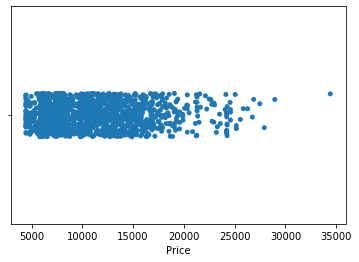

In [11]:
sns.stripplot(df['Price'])

# Data Visualizations

In [12]:
#checking the null values
df.isnull().sum()

Unnamed: 0    0
Name          0
Arrival       0
Departure     0
Duration      0
Price         0
dtype: int64

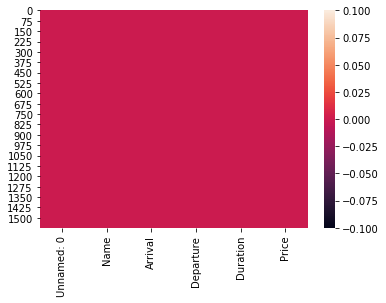

In [13]:
sns.heatmap(df.isnull())

# Feature Engineering

In [14]:
df['Seat Number']=df['Name'].str.split('\n').str[1]

In [15]:
df['Seat Number']

0       SG 8184
1        SG 507
2        SG 611
3        SG 757
4       6E 2339
         ...   
1568    I5 2392
1569    SG 3233
1570     AI 772
1571    I5 1324
1572    I5 1324
Name: Seat Number, Length: 1573, dtype: object

In [16]:
df['Flight Name']=df['Name'].str.split('\n').str[0]

In [17]:
df['Flight Name']

0        SpiceJet
1        SpiceJet
2        SpiceJet
3        SpiceJet
4          Indigo
          ...    
1568     Air Asia
1569     SpiceJet
1570    Air India
1571     Air Asia
1572     Air Asia
Name: Flight Name, Length: 1573, dtype: object

In [18]:
df['Arrival Station']=df['Arrival'].str.split('\n').str[1]

In [19]:
df['Arrival Station']

0           Delhi
1           Delhi
2           Delhi
3           Delhi
4           Delhi
          ...    
1568    Bangalore
1569    Bangalore
1570    Bangalore
1571    Bangalore
1572    Bangalore
Name: Arrival Station, Length: 1573, dtype: object

In [20]:
df['Arrival Time']=df['Arrival'].str.split('\n').str[0]

In [21]:
df['Arrival Time']

0       10:40
1       20:20
2       18:40
3       16:20
4       21:55
        ...  
1568    11:50
1569    09:50
1570    12:00
1571    05:45
1572    05:45
Name: Arrival Time, Length: 1573, dtype: object

In [22]:
df['Departure Station']=df['Departure'].str.split('\n').str[1]

In [23]:
df['Departure Station']

0       Mumbai
1       Mumbai
2       Mumbai
3       Mumbai
4       Mumbai
         ...  
1568     Delhi
1569     Delhi
1570     Delhi
1571     Delhi
1572     Delhi
Name: Departure Station, Length: 1573, dtype: object

In [24]:
df['Departure Time']=df['Departure'].str.split('\n').str[0]

In [25]:
df['Departure Time']

0          12:50
1          22:40
2          20:40
3          18:30
4       00:05+1D
          ...   
1568       19:20
1569       17:45
1570       23:00
1571       10:55
1572       10:55
Name: Departure Time, Length: 1573, dtype: object

In [26]:
df['Flight Duration']=df['Duration'].str.split('\n').str[0]

In [27]:
df['Flight Duration']

0        2h 10m
1        2h 20m
2        2h 00m
3        2h 10m
4        2h 10m
         ...   
1568     7h 30m
1569     7h 55m
1570    11h 00m
1571     5h 10m
1572     5h 10m
Name: Flight Duration, Length: 1573, dtype: object

In [28]:
df['Number of Stops']=df['Duration'].str.split('\n').str[1]

In [29]:
df['Number of Stops']

0       Non Stop
1       Non Stop
2       Non Stop
3       Non Stop
4       Non Stop
          ...   
1568      1 Stop
1569      1 Stop
1570      1 Stop
1571      1 Stop
1572      1 Stop
Name: Number of Stops, Length: 1573, dtype: object

In [30]:
df.columns

Index(['Unnamed: 0', 'Name', 'Arrival', 'Departure', 'Duration', 'Price',
       'Seat Number', 'Flight Name', 'Arrival Station', 'Arrival Time',
       'Departure Station', 'Departure Time', 'Flight Duration',
       'Number of Stops'],
      dtype='object')

# Dropping of Columns

In [31]:
df.drop(['Unnamed: 0', 'Name','Arrival', 'Departure', 'Duration'],axis=1,inplace=True)

In [32]:
df.head()

,Price,Seat Number,Flight Name,Arrival Station,Arrival Time,Departure Station,Departure Time,Flight Duration,Number of Stops
0,5953,SG 8184,SpiceJet,Delhi,10:40,Mumbai,12:50,2h 10m,Non Stop
1,5953,SG 507,SpiceJet,Delhi,20:20,Mumbai,22:40,2h 20m,Non Stop
2,5953,SG 611,SpiceJet,Delhi,18:40,Mumbai,20:40,2h 00m,Non Stop
3,5953,SG 757,SpiceJet,Delhi,16:20,Mumbai,18:30,2h 10m,Non Stop
4,5953,6E 2339,Indigo,Delhi,21:55,Mumbai,00:05+1D,2h 10m,Non Stop


# Feature Engineering

In [33]:
df['Flight Duration'].value_counts()

2h 15m     42
2h 50m     42
2h 05m     42
2h 10m     38
2h 20m     34
           ..
31h 20m     1
26h 50m     1
0h 55m      1
20h 35m     1
3h 20m      1
Name: Flight Duration, Length: 306, dtype: int64

In [34]:
df['Duration_Hours']=df['Flight Duration'].str.split('h').str[0]

In [35]:
df['Duration_Hours']

0        2
1        2
2        2
3        2
4        2
        ..
1568     7
1569     7
1570    11
1571     5
1572     5
Name: Duration_Hours, Length: 1573, dtype: object

In [36]:
df['Duration_Minutes']=df['Flight Duration'].str.split(' ').str[1].str.split('m').str[0]

In [37]:
df['Duration_Minutes']

0       10
1       20
2       00
3       10
4       10
        ..
1568    30
1569    55
1570    00
1571    10
1572    10
Name: Duration_Minutes, Length: 1573, dtype: object

In [38]:
df['Duration_Hours']=df['Duration_Hours'].astype('int32')

In [39]:
df['Duration_Minutes']=df['Duration_Minutes'].astype('int32')

In [40]:
df['Dep_Hour']=df['Departure Time'].str.split(':').str[0]

In [41]:
df['Dep_Hour']

0       12
1       22
2       20
3       18
4       00
        ..
1568    19
1569    17
1570    23
1571    10
1572    10
Name: Dep_Hour, Length: 1573, dtype: object

In [42]:
df['Dep_Minute']=df['Departure Time'].str.split(':').str[1]

In [43]:
df['Dep_Minute']

0          50
1          40
2          40
3          30
4       05+1D
        ...  
1568       20
1569       45
1570       00
1571       55
1572       55
Name: Dep_Minute, Length: 1573, dtype: object

In [44]:
df['Dep_Minute'].value_counts()

35       116
40       115
50       113
55       100
15       100
20        96
05        95
25        93
45        84
00        72
30        69
10        65
35+1D     61
45+1D     51
05+1D     50
20+1D     46
40+1D     43
00+1D     41
15+1D     35
55+1D     33
50+1D     33
10+1D     30
30+1D     20
25+1D     12
Name: Dep_Minute, dtype: int64

In [45]:
df['Dep_Minute']=df['Dep_Minute'].replace('35+1D','1475')

In [46]:
df['Dep_Minute']=df['Dep_Minute'].replace('45+1D','1485')
df['Dep_Minute']=df['Dep_Minute'].replace('05+1D','1445')
df['Dep_Minute']=df['Dep_Minute'].replace('20+1D','1460')
df['Dep_Minute']=df['Dep_Minute'].replace('00+1D','1440')
df['Dep_Minute']=df['Dep_Minute'].replace('15+1D','1455')
df['Dep_Minute']=df['Dep_Minute'].replace('50+1D','1490')
df['Dep_Minute']=df['Dep_Minute'].replace('55+1D','1495')
df['Dep_Minute']=df['Dep_Minute'].replace('10+1D','1450')
df['Dep_Minute']=df['Dep_Minute'].replace('30+1D','1470')
df['Dep_Minute']=df['Dep_Minute'].replace('25+1D','1465')
df['Dep_Minute']=df['Dep_Minute'].replace('40+1D','1480')

In [47]:
df['Dep_Minute'].value_counts()

35      116
40      115
50      113
55      100
15      100
20       96
05       95
25       93
45       84
00       72
30       69
10       65
1475     61
1485     51
1445     50
1460     46
1480     43
1440     41
1455     35
1495     33
1490     33
1450     30
1470     20
1465     12
Name: Dep_Minute, dtype: int64

In [48]:
df['Dep_Hour']=df['Dep_Hour'].astype('int')
df['Dep_Minute']=df['Dep_Minute'].astype('int')

In [49]:
df['Arrival_Hour']=df['Arrival Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival Time'].str.split(':').str[1]

In [50]:
df['Arrival_Hour']=df['Arrival_Hour'].astype('int')
df['Arrival_Minute']=df['Arrival_Minute'].astype('int')

# Dropping of Columns

In [51]:
df.drop(['Arrival Time','Flight Duration','Departure Time'],axis=1,inplace=True)

In [52]:
df.head()

,Price,Seat Number,Flight Name,Arrival Station,Departure Station,Number of Stops,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,5953,SG 8184,SpiceJet,Delhi,Mumbai,Non Stop,2,10,12,50,10,40
1,5953,SG 507,SpiceJet,Delhi,Mumbai,Non Stop,2,20,22,40,20,20
2,5953,SG 611,SpiceJet,Delhi,Mumbai,Non Stop,2,0,20,40,18,40
3,5953,SG 757,SpiceJet,Delhi,Mumbai,Non Stop,2,10,18,30,16,20
4,5953,6E 2339,Indigo,Delhi,Mumbai,Non Stop,2,10,0,1445,21,55


In [53]:
df['Seat Number'].value_counts()

I5 633     30
UK 868     17
I5 634     16
I5 328     16
I5 1321    16
           ..
AI 9741     1
G8 334      1
AI 660      1
AI 774      1
UK 667      1
Name: Seat Number, Length: 534, dtype: int64

In [54]:
df['Number of Stops'].value_counts()

1 Stop      944
Non Stop    426
2 Stops     201
3 Stops       2
Name: Number of Stops, dtype: int64

# Feature Engineering

In [55]:
df['Number of Stops']=df['Number of Stops'].replace('Non Stop','0 Stop')
df['Number of Stops']

0       0 Stop
1       0 Stop
2       0 Stop
3       0 Stop
4       0 Stop
         ...  
1568    1 Stop
1569    1 Stop
1570    1 Stop
1571    1 Stop
1572    1 Stop
Name: Number of Stops, Length: 1573, dtype: object

In [56]:
df['Number of Stops']=df['Number of Stops'].str.split(' ').str[0]
df['Number of Stops']

0       0
1       0
2       0
3       0
4       0
       ..
1568    1
1569    1
1570    1
1571    1
1572    1
Name: Number of Stops, Length: 1573, dtype: object

In [57]:
df['Number of Stops'].value_counts()

1    944
0    426
2    201
3      2
Name: Number of Stops, dtype: int64

In [58]:
df['Number of Stops']=df['Number of Stops'].astype('int')

In [59]:
df['Seat Number']=df['Seat Number'].str.split(' ').str[0]
df['Seat Number']

0       SG
1       SG
2       SG
3       SG
4       6E
        ..
1568    I5
1569    SG
1570    AI
1571    I5
1572    I5
Name: Seat Number, Length: 1573, dtype: object

In [60]:
df['Seat Number'].value_counts()

6E    498
I5    310
AI    290
UK    250
G8    146
SG     79
Name: Seat Number, dtype: int64

In [61]:
df.head()

,Price,Seat Number,Flight Name,Arrival Station,Departure Station,Number of Stops,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,5953,SG,SpiceJet,Delhi,Mumbai,0,2,10,12,50,10,40
1,5953,SG,SpiceJet,Delhi,Mumbai,0,2,20,22,40,20,20
2,5953,SG,SpiceJet,Delhi,Mumbai,0,2,0,20,40,18,40
3,5953,SG,SpiceJet,Delhi,Mumbai,0,2,10,18,30,16,20
4,5953,6E,Indigo,Delhi,Mumbai,0,2,10,0,1445,21,55


# Univariate Analysis

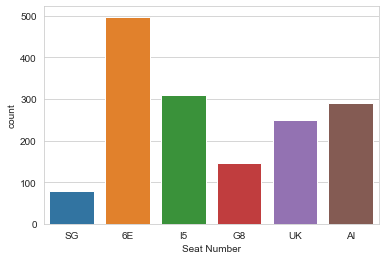

In [62]:
sns.set_style('whitegrid')
sns.countplot(df['Seat Number'])

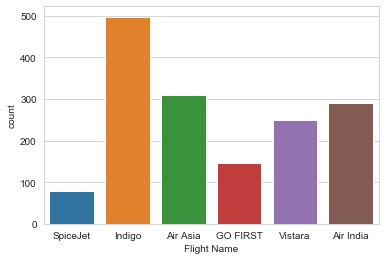

In [63]:
sns.set_style('whitegrid')
sns.countplot(df['Flight Name'])

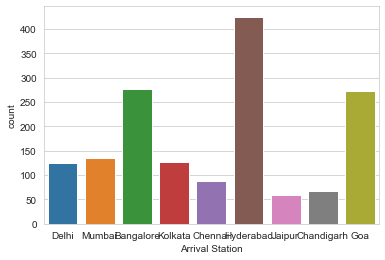

In [64]:
sns.set_style('whitegrid')
sns.countplot(df['Arrival Station'])

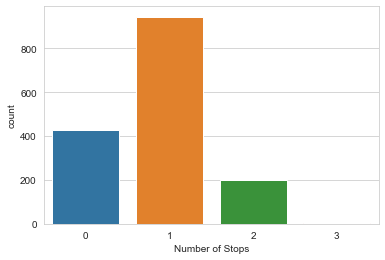

In [65]:
sns.set_style('whitegrid')
sns.countplot(df['Number of Stops'])

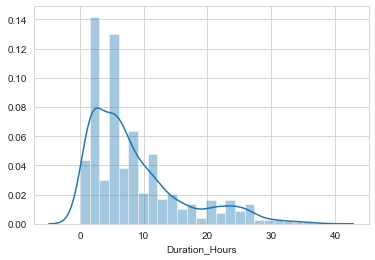

In [66]:
sns.distplot(df['Duration_Hours'])

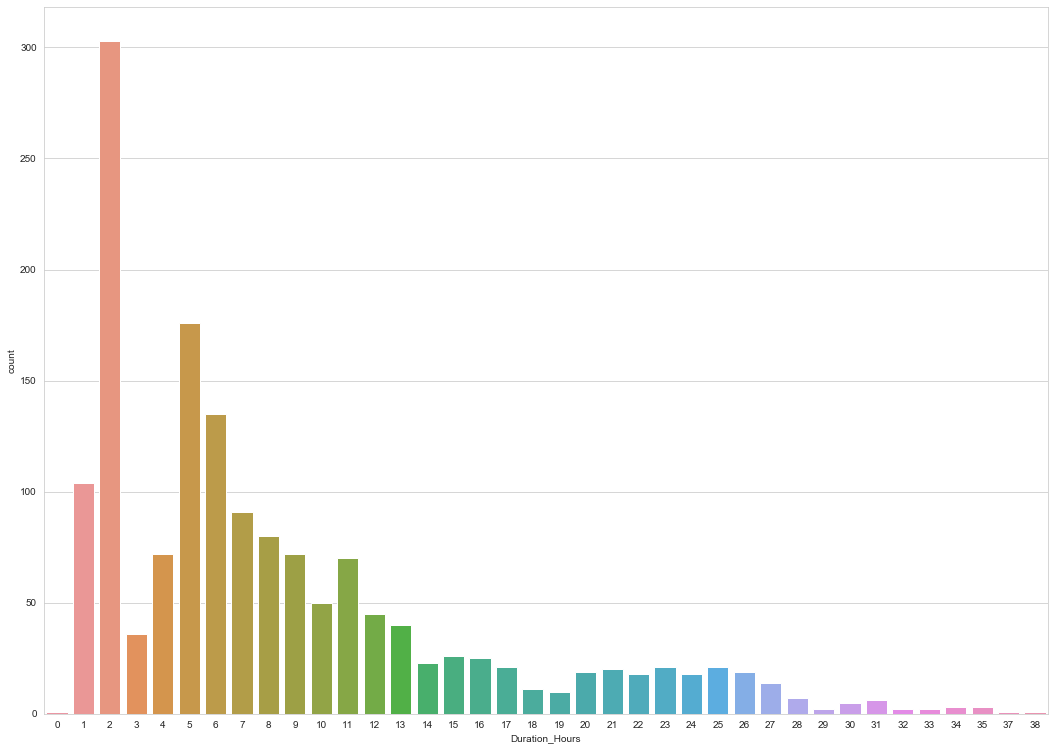

In [67]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,13))
sns.countplot(df['Duration_Hours'])

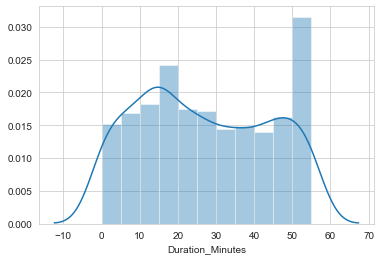

In [69]:
sns.set_style('whitegrid')
sns.distplot(df['Duration_Minutes'])

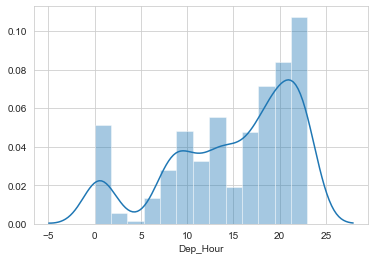

In [70]:
sns.set_style('whitegrid')
sns.distplot(df['Dep_Hour'])

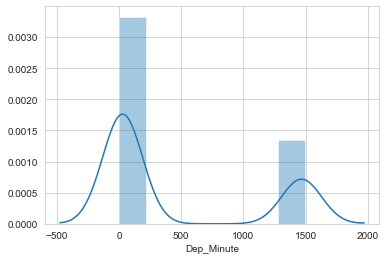

In [71]:
sns.set_style('whitegrid')
sns.distplot(df['Dep_Minute'])

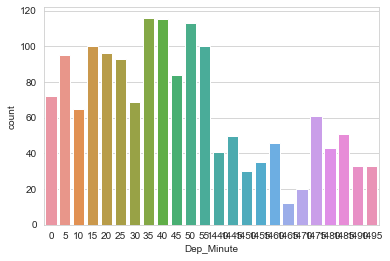

In [72]:
sns.countplot(df['Dep_Minute'])

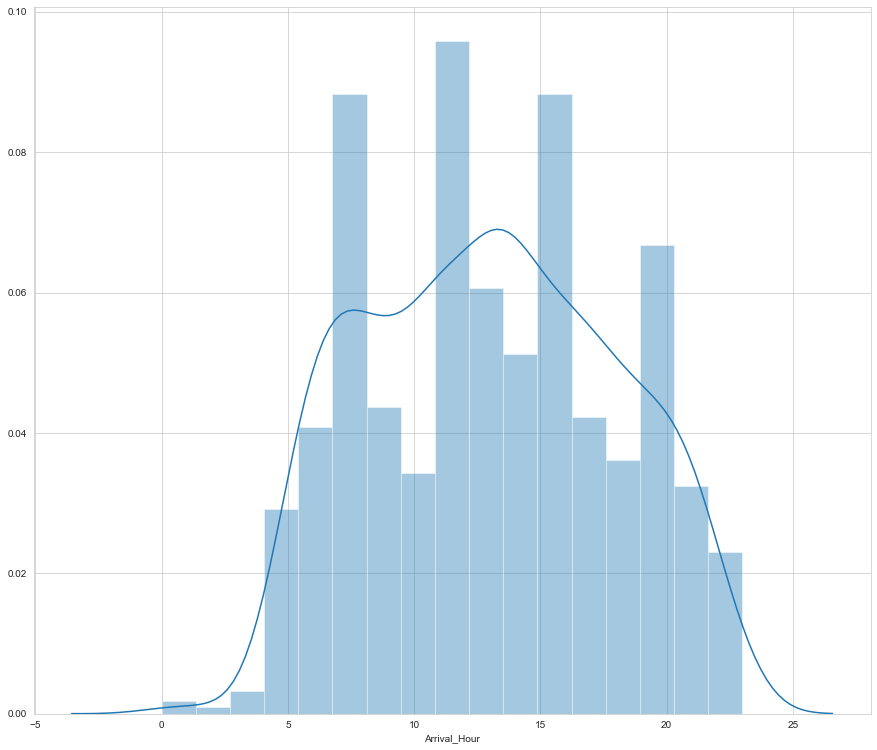

In [73]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,13))
sns.distplot(df['Arrival_Hour'])

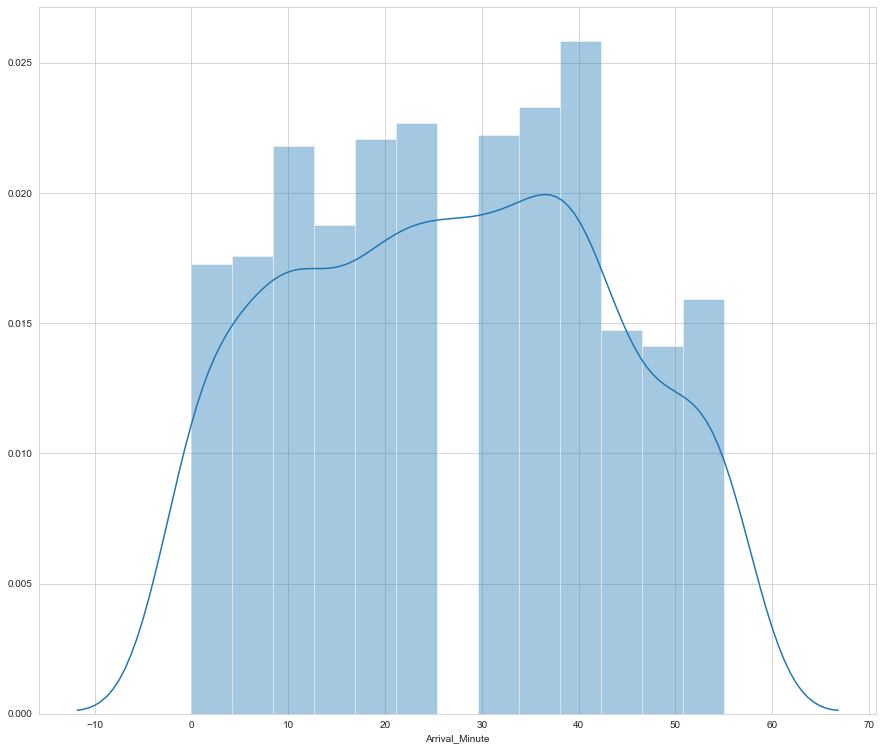

In [74]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,13))
sns.distplot(df['Arrival_Minute'])

# Bivariate Analysis

In [75]:
df.columns

Index(['Price', 'Seat Number', 'Flight Name', 'Arrival Station',
       'Departure Station', 'Number of Stops', 'Duration_Hours',
       'Duration_Minutes', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute'],
      dtype='object')

In [76]:
list=['Seat Number', 'Flight Name', 'Arrival Station',
       'Departure Station', 'Number of Stops', 'Duration_Hours',
       'Duration_Minutes', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute']

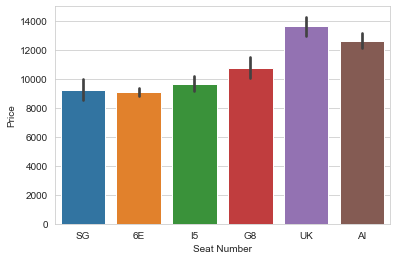

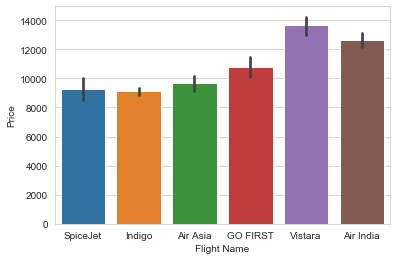

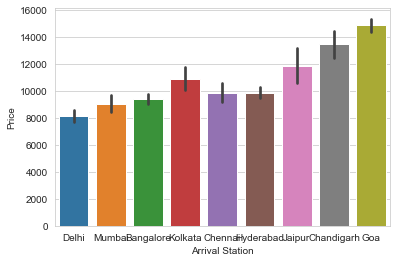

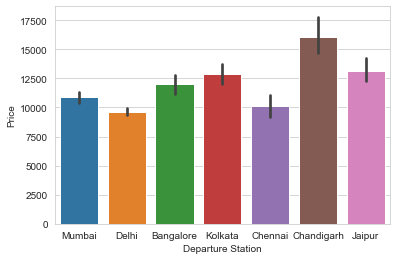

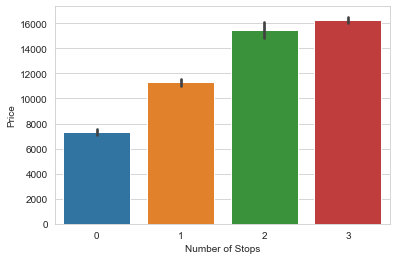

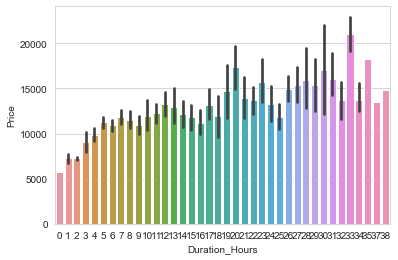

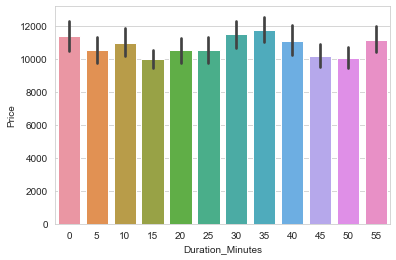

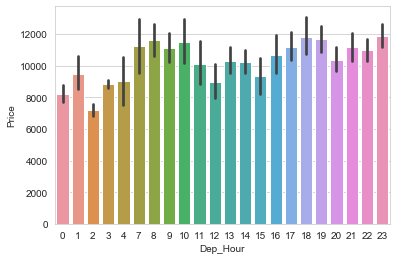

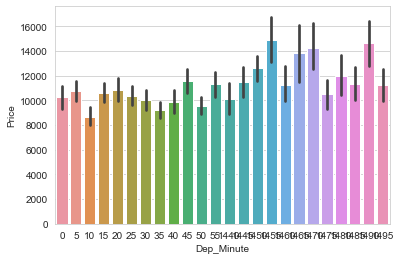

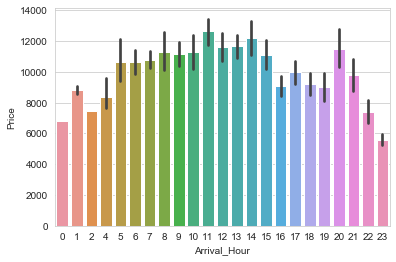

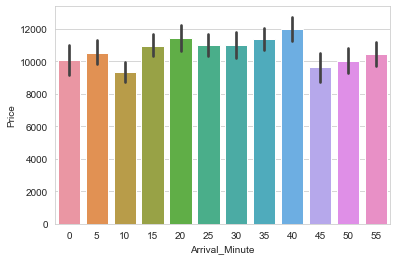

In [77]:
for i in list:
    sns.set_style('whitegrid')
    sns.barplot(x=i,y='Price',data=df)
    plt.show()

# Label Encoding

In [78]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [79]:
list=['Seat Number', 'Flight Name', 'Arrival Station',
       'Departure Station']
for i in list:
    print(df[i].unique())
    df[i]=LE.fit_transform(df[i])
    print(df[i].unique())

['SG' '6E' 'I5' 'G8' 'UK' 'AI']
[4 0 3 2 5 1]
['SpiceJet' 'Indigo' 'Air Asia' 'GO FIRST' 'Vistara' 'Air India']
[4 3 0 2 5 1]
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Chennai' 'Hyderabad' 'Jaipur'
 'Chandigarh' 'Goa']
[3 8 0 7 2 5 6 1 4]
['Mumbai' 'Delhi' 'Bangalore' 'Kolkata' 'Chennai' 'Chandigarh' 'Jaipur']
[6 3 0 5 2 1 4]


In [80]:
df

,Price,Seat Number,Flight Name,Arrival Station,Departure Station,Number of Stops,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,5953,4,4,3,6,0,2,10,12,50,10,40
1,5953,4,4,3,6,0,2,20,22,40,20,20
2,5953,4,4,3,6,0,2,0,20,40,18,40
3,5953,4,4,3,6,0,2,10,18,30,16,20
4,5953,0,3,3,6,0,2,10,0,1445,21,55
...,...,...,...,...,...,...,...,...,...,...,...,...
1568,16174,3,0,0,3,1,7,30,19,20,11,50
1569,16306,4,4,0,3,1,7,55,17,45,9,50
1570,21137,1,1,0,3,1,11,0,23,0,12,0
1571,24208,3,0,0,3,1,5,10,10,55,5,45


In [81]:
df.dtypes

Price                int64
Seat Number          int32
Flight Name          int32
Arrival Station      int32
Departure Station    int32
Number of Stops      int32
Duration_Hours       int32
Duration_Minutes     int32
Dep_Hour             int32
Dep_Minute           int32
Arrival_Hour         int32
Arrival_Minute       int32
dtype: object

# Multivariate Analysis

In [82]:
dfcorr=df.corr()
dfcorr

,Price,Seat Number,Flight Name,Arrival Station,Departure Station,Number of Stops,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
Price,1.000000,0.209040,0.102703,0.015988,0.010957,0.550734,0.469412,-0.004099,0.140609,0.171740,-0.124995,0.036216
Seat Number,0.209040,1.000000,0.263740,-0.029541,-0.039126,0.212780,0.294809,-0.030936,-0.051173,0.254145,0.055154,0.094031
Flight Name,0.102703,0.263740,1.000000,-0.017593,0.005634,-0.125413,-0.004864,-0.028689,0.181853,-0.097626,0.046531,0.044116
Arrival Station,0.015988,-0.029541,-0.017593,1.000000,-0.059196,-0.008239,0.009023,-0.163951,0.007432,0.015118,0.046238,-0.042913
Departure Station,0.010957,-0.039126,0.005634,-0.059196,1.000000,-0.013489,0.003170,0.019421,0.045780,-0.040878,-0.036628,0.040349
Number of Stops,0.550734,0.212780,-0.125413,-0.008239,-0.013489,1.000000,0.658729,0.068117,0.088281,0.355816,-0.077921,0.057892
Duration_Hours,0.469412,0.294809,-0.004864,0.009023,0.003170,0.658729,1.000000,0.014828,0.015891,0.654709,-0.013314,0.050146
Duration_Minutes,-0.004099,-0.030936,-0.028689,-0.163951,0.019421,0.068117,0.014828,1.000000,-0.001796,0.039120,0.007718,-0.016258
Dep_Hour,0.140609,-0.051173,0.181853,0.007432,0.045780,0.088281,0.015891,-0.001796,1.000000,-0.594643,0.032584,0.018485
Dep_Minute,0.171740,0.254145,-0.097626,0.015118,-0.040878,0.355816,0.654709,0.039120,-0.594643,1.000000,0.419373,0.059408


In [83]:
df.describe()

,Price,Seat Number,Flight Name,Arrival Station,Departure Station,Number of Stops,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,10754.796567,1.956771,2.315321,3.910998,3.639542,0.859504,8.530197,26.490782,15.015257,445.162111,13.029879,26.897648
std,4529.753777,1.810884,1.680149,2.450209,1.800237,0.619833,7.315057,17.017225,6.781938,652.628680,4.891676,16.209909
min,4450.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7391.000000,0.000000,1.000000,2.000000,3.000000,0.000000,2.000000,10.000000,10.000000,20.000000,9.000000,15.000000
50%,9902.000000,1.000000,3.000000,4.000000,3.000000,1.000000,6.000000,25.000000,17.000000,40.000000,13.000000,25.000000
75%,13297.000000,3.000000,3.000000,5.000000,5.000000,1.000000,11.000000,40.000000,21.000000,1445.000000,17.000000,40.000000
max,34408.000000,5.000000,5.000000,8.000000,6.000000,3.000000,38.000000,55.000000,23.000000,1495.000000,23.000000,55.000000


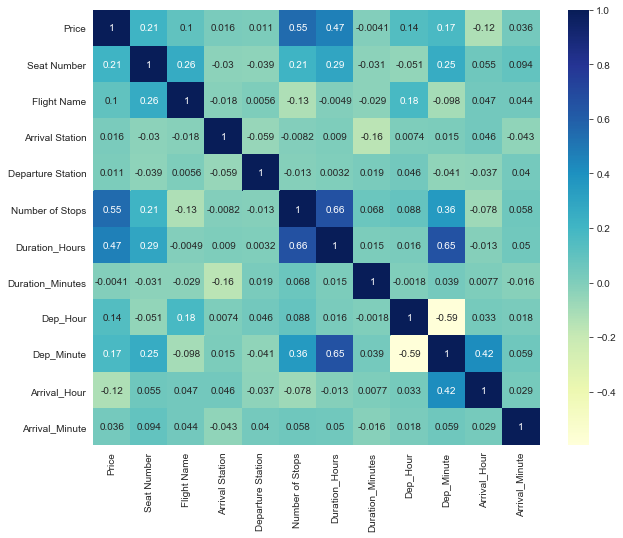

In [84]:
# Multivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

# Plotting Outliers

In [85]:
df.shape

(1573, 12)

Price                   AxesSubplot(0.125,0.125;0.0545775x0.755)
Seat Number          AxesSubplot(0.190493,0.125;0.0545775x0.755)
Flight Name          AxesSubplot(0.255986,0.125;0.0545775x0.755)
Arrival Station      AxesSubplot(0.321479,0.125;0.0545775x0.755)
Departure Station    AxesSubplot(0.386972,0.125;0.0545775x0.755)
Number of Stops      AxesSubplot(0.452465,0.125;0.0545775x0.755)
Duration_Hours       AxesSubplot(0.517958,0.125;0.0545775x0.755)
Duration_Minutes     AxesSubplot(0.583451,0.125;0.0545775x0.755)
Dep_Hour             AxesSubplot(0.648944,0.125;0.0545775x0.755)
Dep_Minute           AxesSubplot(0.714437,0.125;0.0545775x0.755)
Arrival_Hour          AxesSubplot(0.77993,0.125;0.0545775x0.755)
Arrival_Minute       AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

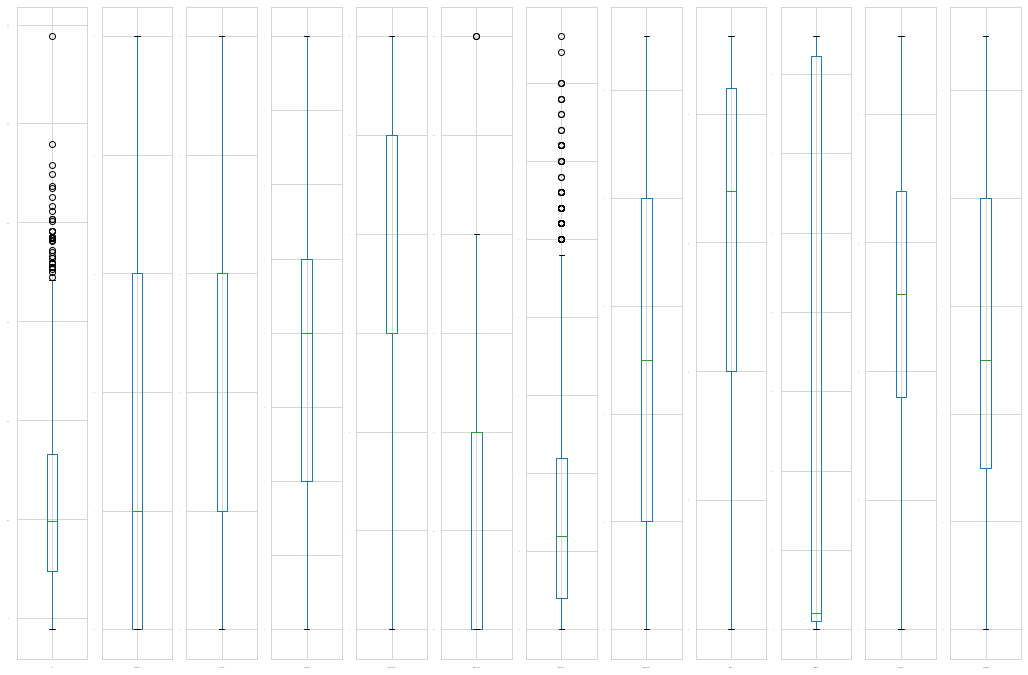

In [86]:
df.plot(kind='box',subplots=True,layout=(1,12),sharex=False,fontsize=1,figsize=(18,12))

# Removing Outliers

In [87]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [88]:
z

array([[1.06039397, 1.12866389, 1.00301493, ..., 0.60568558, 0.61959186,
        0.80854982],
       [1.06039397, 1.12866389, 1.00301493, ..., 0.6210131 , 1.42534729,
        0.42565578],
       [1.06039397, 1.12866389, 1.00301493, ..., 0.6210131 , 1.01635946,
        0.80854982],
       ...,
       [2.29273061, 0.5285125 , 0.78310864, ..., 0.68232318, 0.21060403,
        1.65986138],
       [2.97090801, 0.57627176, 1.37848316, ..., 0.59802182, 1.64206144,
        1.11710122],
       [3.18091996, 0.57627176, 1.37848316, ..., 0.59802182, 1.64206144,
        1.11710122]])

In [89]:
threshold=3
print(np.where(z>3))

(array([ 258,  384,  396,  496,  521,  522,  596,  599,  604,  765,  769,
        774,  794,  965,  966,  967,  969, 1077, 1079, 1080, 1093, 1094,
       1160, 1161, 1218, 1220, 1305, 1306, 1334, 1335, 1336, 1337, 1368,
       1369, 1560, 1572], dtype=int64), array([0, 6, 0, 6, 0, 0, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 0,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 5, 5, 6, 0], dtype=int64))


In [90]:
df_new=df[(z<3).all(axis=1)]

In [91]:
df_new.shape

(1537, 12)

In [92]:
df.shape

(1573, 12)

In [93]:
((1573-1537)/1573)*100

2.2886204704386524

In [94]:
df=df_new

# To check Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7C836AC08>,
      dtype=object)

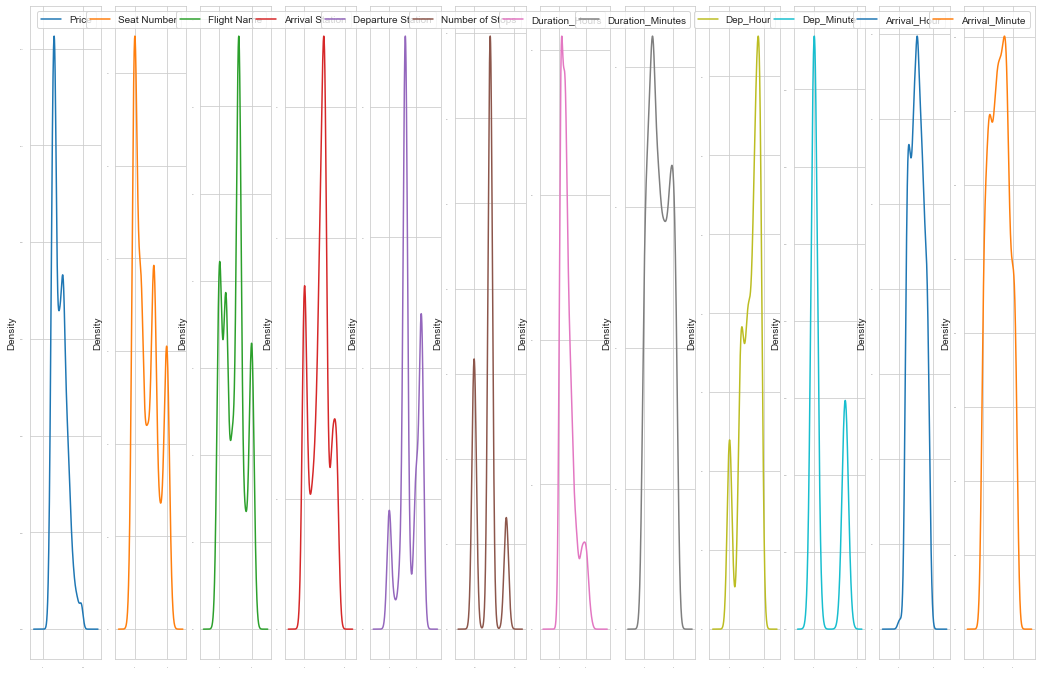

In [95]:
df.plot(kind='density',subplots=True,layout=(1,12),sharex=False,fontsize=1,figsize=(18,12))

In [96]:
df.skew()

Price                0.852128
Seat Number          0.438383
Flight Name          0.093622
Arrival Station     -0.202898
Departure Station   -0.257235
Number of Stops      0.090073
Duration_Hours       1.258747
Duration_Minutes     0.128163
Dep_Hour            -0.763417
Dep_Minute           0.988446
Arrival_Hour         0.040881
Arrival_Minute       0.030462
dtype: float64

In [97]:
df_rs=['Duration_Hours','Dep_Minute']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [98]:
df.skew()

Price                0.852128
Seat Number          0.438383
Flight Name          0.093622
Arrival Station     -0.202898
Departure Station   -0.257235
Number of Stops      0.090073
Duration_Hours       0.561970
Duration_Minutes     0.128163
Dep_Hour            -0.763417
Dep_Minute           0.944907
Arrival_Hour         0.040881
Arrival_Minute       0.030462
dtype: float64

In [99]:
df_rs=['Duration_Hours']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [100]:
df.skew()

Price                0.852128
Seat Number          0.438383
Flight Name          0.093622
Arrival Station     -0.202898
Departure Station   -0.257235
Number of Stops      0.090073
Duration_Hours       0.132725
Duration_Minutes     0.128163
Dep_Hour            -0.763417
Dep_Minute           0.944907
Arrival_Hour         0.040881
Arrival_Minute       0.030462
dtype: float64

# Train Test Split

In [101]:
df.columns

Index(['Price', 'Seat Number', 'Flight Name', 'Arrival Station',
       'Departure Station', 'Number of Stops', 'Duration_Hours',
       'Duration_Minutes', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute'],
      dtype='object')

In [102]:
x=df[['Seat Number', 'Flight Name', 'Arrival Station',
       'Departure Station', 'Number of Stops', 'Duration_Hours',
       'Duration_Minutes', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute']]
y=df['Price']

# Scaling of Data

In [103]:
#scaling the input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [104]:
x=pd.DataFrame(x)

In [105]:
x.columns=['Seat Number', 'Flight Name', 'Arrival Station',
       'Departure Station', 'Number of Stops', 'Duration_Hours',
       'Duration_Minutes', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute']

In [106]:
df.head()

,Price,Seat Number,Flight Name,Arrival Station,Departure Station,Number of Stops,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,5953,4,4,3,6,0,1.189207,10,12,7.071068,10,40
1,5953,4,4,3,6,0,1.189207,20,22,6.324555,20,20
2,5953,4,4,3,6,0,1.189207,0,20,6.324555,18,40
3,5953,4,4,3,6,0,1.189207,10,18,5.477226,16,20
4,5953,0,3,3,6,0,1.189207,10,0,38.013156,21,55


In [107]:
df.shape

(1537, 12)

# Algorithms

In [108]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.38966214994519355
error:
Mean absolute error: 2769.0347493699946
Mean squared error: 12484807.599357698
Root Mean squared error: 3533.3847228058394
0.35219728929702987
error:
Mean absolute error: 2614.7939561875896
Mean squared error: 11116379.517191395
Root Mean squared error: 3334.123500590732
0.2947905247232335
error:
Mean absolute error: 2799.358348782049
Mean squared error: 12702122.266206235
Root Mean squared error: 3564.00368493163
0.3474996241919206
error:
Mean absolute error: 2665.7803837961137
Mean squared error: 11271582.58100595
Root Mean squared error: 3357.317765866965
0.39294070984758134
error:
Mean absolute error: 2687.352453642981
Mean squared error: 11398638.783682114
Root Mean squared error: 3376.187018469521
0.35911127249741626
error:
Mean absolute error: 2652.5698583776625
Mean squared error: 11798861.869486157
Root Mean squared error: 3434.947142167716
0.35893127421034055
error:
Mean absolute error: 2618.3422249879195
Mean squared error: 11648797.574715255
Root 

In [109]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=21)

In [110]:
#checking the shape of training and testing data
print(x_train.shape,x_test.shape)

(1198, 11) (339, 11)


In [111]:
print(y_train.shape,y_test.shape)

(1198,) (339,)


In [112]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [113]:
# All algorithms using loop
model=[LinearRegression(), Lasso(),Ridge(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()
       ,RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('score of',m,'is:',score)
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    mean_squared_error_lm=mean_squared_error(y_test,pred)
    print('Mean squared error:',mean_squared_error_lm)
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    r2score=r2_score(y_test,pred)
    print('r2_score:',r2_score(y_test,pred))
    print('**********************************')
    print('\n')

score of LinearRegression() is: 0.3453619222465406
Mean absolute error: 2622.2269475684616
Mean squared error: 11205768.119095558
Root Mean squared error: 3347.501772829338
r2_score: 0.4352225306876266
**********************************


score of Lasso() is: 0.3453581453888024
Mean absolute error: 2622.6038686358015
Mean squared error: 11212099.319068462
Root Mean squared error: 3348.4472997299004
r2_score: 0.43490343439182577
**********************************


score of Ridge() is: 0.3453616811947976
Mean absolute error: 2622.517469268043
Mean squared error: 11207741.171827365
Root Mean squared error: 3347.796465113637
r2_score: 0.43512308764036334
**********************************


score of ElasticNet() is: 0.3231773434656332
Mean absolute error: 2773.173739150393
Mean squared error: 12088673.33400818
Root Mean squared error: 3476.8769512319786
r2_score: 0.3907235755404721
**********************************


score of SVR() is: -0.017147428843864
Mean absolute error: 3506.6353778

# Cross Validation Score¶

In [114]:
from sklearn.model_selection import cross_val_score
lrscores=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print(lrscores)
# Fix the sign
scoresrf=(lrscores)**2
print(scoresrf.mean(),scoresrf.std())

[-1.79283364 -0.08110919 -1.09083132 -0.49882445  0.22605773]
0.9421344115664093 1.2143965145901134


# Hyper Parameter Tuning

In [115]:
# Using GridSearchCv for hyper parameter tuning of DecisionTreeRegressor
dtr=DecisionTreeRegressor()
grid_param={"splitter":["best","random"],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
gd_sr=GridSearchCV(estimator=dtr,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [116]:
gd_sr.best_params_

{'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [117]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
mean_squared_error_rf=mean_squared_error(y_test,preddtr)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

0.7718883178805158
error:
Mean absolute error: 1079.8692232055064
Mean squared error: 4525971.296624057
Root Mean squared error: 2127.43302987992


In [118]:
dtr=DecisionTreeRegressor(max_depth=100000,
 max_features='auto',
# max_leaf_nodes= None,
 min_samples_leaf=0.000001
 #splitter='best'
                         )
dtr.fit(x_train,y_train)
score=dtr.score(x_train,y_train)
pred=dtr.predict(x_test)
print('score of',dtr,'is:',score)
print('Mean absolute error:',mean_absolute_error(y_test,pred))
mean_squared_error_lm=mean_squared_error(y_test,pred)
print('Mean squared error:',mean_squared_error_lm)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
r2score=r2_score(y_test,pred)
print('r2_score:',r2_score(y_test,pred))
print('**********************************')
print('\n')

score of DecisionTreeRegressor(max_depth=100000, max_features='auto',
                      min_samples_leaf=1e-06) is: 0.9970431444269475
Mean absolute error: 1130.7630285152409
Mean squared error: 4997363.014913143
Root Mean squared error: 2235.4782519436735
r2_score: 0.7481298910702697
**********************************




# Saving the best model

In [119]:
#saving the best model
import joblib
joblib.dump(dtr,"dtr_flight_pricing.obj")

['dtr_flight_pricing.obj']